# Recommendation System

### Taken from Collective Intelligence

### Collaborative Filtering, Neighbors Based

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a set of reviews

In [38]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={'Lisa Rose': 
             {'Lady in the Water': 2.5, 
              'Snakes on a Plane': 3.5,
              'Just My Luck': 3.0, 
              'Superman Returns': 3.5,
              'You, Me and Dupree': 2.5,
              'The Night Listener': 3.0},
    'Gene Seymour':
             {'Lady in the Water': 3.0, 
              'Snakes on a Plane': 3.5,
              'Just My Luck': 1.5, 
              'Superman Returns': 5.0, 
              'The Night Listener': 3.0,
              'You, Me and Dupree': 3.5},
    'Michael Phillips': 
             {'Lady in the Water': 2.5,
              'Snakes on a Plane': 3.0,
              'Superman Returns': 3.5, 
              'The Night Listener': 4.0},
    'Claudia Puig': 
             {'Snakes on a Plane': 3.5, 
              'Just My Luck': 3.0,
              'The Night Listener': 4.5, 
              'Superman Returns': 4.0,
              'You, Me and Dupree': 2.5},
    'Mick LaSalle': 
             {'Lady in the Water': 3.0, 
              'Snakes on a Plane': 4.0,
              'Just My Luck': 2.0, 
              'Superman Returns': 3.0, 
              'The Night Listener': 3.0,
              'You, Me and Dupree': 2.0},
    'Jack Matthews': 
             {'Lady in the Water': 3.0, 
              'Snakes on a Plane': 4.0,
              'The Night Listener': 3.0, 
              'Superman Returns': 5.0, 
              'You, Me and Dupree': 3.5},
    'Toby': 
             {'Snakes on a Plane':4.5,
              'You, Me and Dupree':1.0,
              'Superman Returns':4.0}}

In [39]:
critics.keys()

['Jack Matthews',
 'Mick LaSalle',
 'Claudia Puig',
 'Lisa Rose',
 'Toby',
 'Gene Seymour',
 'Michael Phillips']

# Plot ratings for Snakes on a Plane and You, Me, & Dupreee

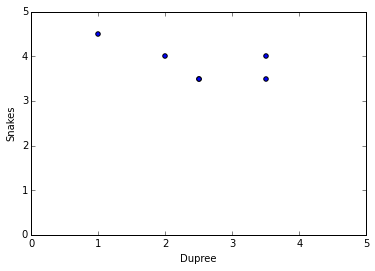

In [7]:
x = []
y = []
for c in ['Jack Matthews', 'Mick LaSalle', 'Claudia Puig', 'Lisa Rose', 'Toby', 'Gene Seymour']:
    y.append(critics[c]['Snakes on a Plane'])
    x.append(critics[c]['You, Me and Dupree'])
plt.scatter(x, y)
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Dupree')
plt.ylabel('Snakes')

# Define Similarity

### Euclidean

In [13]:
def euc(prefs,person1,person2):
    # Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
    # if they have no ratings in common, return 0
    if len(si)==0: return 0
    
    # Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2) for item in prefs[person1] if item in prefs[person2]])
    return sum_of_squares

In [15]:
euc(critics, 'Lisa Rose','Gene Seymour')

5.75

In [16]:
from math import sqrt
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
    # Get the list of shared_items
    si={}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item]=1
    # if they have no ratings in common, return 0
    if len(si)==0: return 0
    
    # Add up the squares of all the differences
    sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2) for item in prefs[person1] if item in prefs[person2]])
    return 1/(1+sum_of_squares)


In [17]:
sim_distance(critics, 'Lisa Rose','Gene Seymour')

0.14814814814814814

### Let's change it to make more similar items larger an in 0 to 1 range

In [18]:
1/(1+sqrt(pow(5-4,2)+pow(4-1,2)))

0.2402530733520421

### Pearson Correlation Score

In [19]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
    # Get the list of mutually rated items
    si={}
    for item in prefs[p1]:
        if item in prefs[p2]: si[item]=1
    # Find the number of elements
    
    n=len(si)
    
    # if they are no ratings in common, return 0
    if n==0: return 0
    
    # Add up all the preferences
    sum1=sum([prefs[p1][it] for it in si])
    sum2=sum([prefs[p2][it] for it in si])
    
    # Sum up the squares
    sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
    sum2Sq=sum([pow(prefs[p2][it],2) for it in si])
    
    # Sum up the products
    pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
    
    # Calculate Pearson score
    num=pSum-(sum1*sum2/n)
    den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
    if den==0: return 0
    
    r=num/den
    
    return r

In [20]:
print sim_pearson(critics, 'Lisa Rose','Gene Seymour')

0.396059017191


# Plot Gene and Mick's Preferences

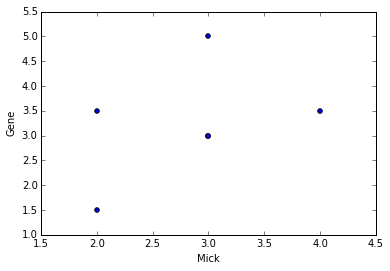

In [23]:
x = []
y = []
for m in ['Just My Luck',  'Lady in the Water',  'Snakes on a Plane',  'Superman Returns',  'The Night Listener', 'You, Me and Dupree']:
    x.append(critics['Mick LaSalle'][m])
    y.append(critics['Gene Seymour'][m])
plt.scatter(x,y)
plt.xlabel('Mick')
plt.ylabel('Gene')

These can have similar behavior but one person consistently rates higher than the other. Pearson accounts for this. This gives scores between -1 to 1.

There are many metrics to explore.

# Ranking

In [28]:
# Returns the best matches for person from the prefs dictionary.
# Number of results and similarity function are optional params.
def topMatches(prefs, person,n=5,similarity=sim_pearson):
    scores=[(similarity(prefs,person,other),other)for other in prefs if other!=person]
    
    # Sort the list so the highest scores appear at the top 
    scores.sort( )
    scores.reverse()
    return scores[0:n]

In [29]:
topMatches(critics,'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

# Recommending

### Take a weighted average of all reviewers

* Get similarity
* Multiply the similarity and the rating
* Sum over the ratings
* Normalize: Need to normalize because otherwise items with more ratings would have an advantage

In [32]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson):
    totals={}
    simSums={}
    for other in prefs:
        # don't compare me to myself
        if other==person: continue
        sim=similarity(prefs,person,other)
        
        # ignore scores of zero or lower
        if sim<=0: continue
        for item in prefs[other]:
            
            # only score movies I haven't seen yet
            if item not in prefs[person] or prefs[person][item]==0:
                # Similarity * Score 
                totals.setdefault(item,0) 
                totals[item]+=prefs[other][item]*sim 
                # Sum of similarities 
                simSums.setdefault(item,0) 
                simSums[item]+=sim

    # Create the normalized list
    rankings=[(total/simSums[item],item) for item,total in totals.items()]
    # Return the sorted list 
    rankings.sort( ) 
    rankings.reverse( ) 
    return rankings

### Now we can get a ranked order of recommendations and predicted score, rating

In [33]:
getRecommendations(critics,'Toby')

[(3.3477895267131013, 'The Night Listener'),
 (2.8325499182641614, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

In [34]:
getRecommendations(critics,'Toby',similarity=sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

# Can do the same things for products

Switch users an movies 

In [35]:
def transformPrefs(prefs):
    result={}
    for person in prefs:
        for item in prefs[person]:
            result.setdefault(item,{})
            
            # Flip item and person
            result[item][person]=prefs[person][item]
    return result

In [36]:
movies= transformPrefs(critics)
topMatches(movies,'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

We have negative scores. Those that like Superman don't like Just My Luck

We can recommend critics for a movie

In [37]:
getRecommendations(movies,'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

Switching things around allows us to look differently at things

* I can recommend a product to a person
* Or I can search for people who might buy a particular product